## Used Cellphone Analysis by Samuel

### Import Dataset

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly
import plotly.express as px
import statsmodels.api as sm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("cellphone.csv",index_col=0)
data

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762


In [4]:
data.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price
count,3253.000000,3253.000000,3253.00000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000
mean,13.617476,9.476354,6.09379,52.098632,3.962960,3074.926990,182.493637,2015.766370,695.695358,4.342386
std,3.851520,4.802200,6.59958,85.442242,1.225895,1296.957619,90.359810,2.187719,235.454084,0.579414
min,5.080000,0.080000,0.00000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867
25%,12.700000,5.000000,2.00000,16.000000,4.000000,2100.000000,140.450000,2014.000000,564.000000,4.019262
50%,12.830000,8.000000,5.00000,32.000000,4.000000,3000.000000,158.000000,2015.000000,705.000000,4.377642
75%,15.320000,13.000000,8.00000,64.000000,4.000000,3950.000000,182.000000,2018.000000,879.000000,4.725616
max,30.710000,48.000000,32.00000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433


#### Problem 

Memprediksi harga cellphone bekas dengan 13 variabel independen 

#### Solusi
Pemecahan masalah menggunakan metode regresi linear 

### Data Understanding 

Data penjualan cell bekas dari berbagai spesifikasi dan brand 

>- $device$ $brand$: brand cellphone
>- $os$: sistem operasi
>- $screen$ $size$: ukuran layar dalam cm
>- $4g$: Whether 4G is available or not
>- $5g$: Whether 5G is available or not
>- $front$ $camera$ $mp$: Resolution of the rear camera in megapixels
>- $back$ $camera$ $mp$: 	Resolution of the front camera in megapixels
>- $internal$ $memory$: Jumlah internal memory (ROM) in GB
>- $ram$: Jumlah RAM in GB
>- $battery$: kapasitas energi baterai dalam mAh
>- $weight$: berati device grams
>- $release$ $year$: Tahun rilis perngkat model
>- $days$ $used$: Jumlah hari device digunakan 
>- $(Target)$ $normalized$ $used$ $price$: Harga device

### EDA dan Visualisasi


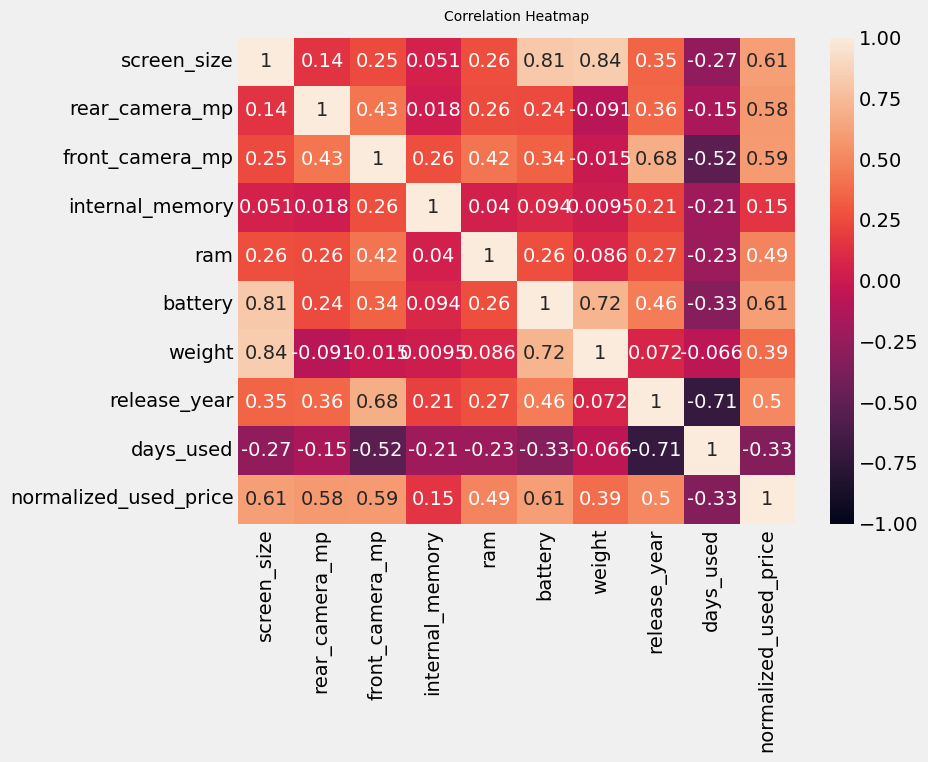

In [36]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);

#### Insight
Korelasi tertinggi terhadap harga adalah ukuran layar dan baterai dengan korelasi sebesar 0.61

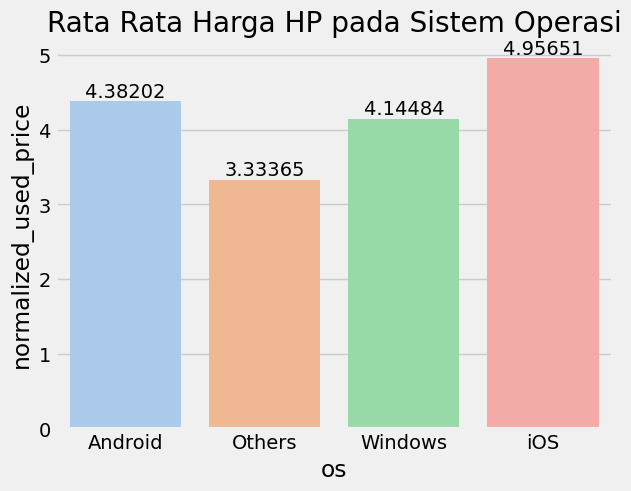

In [37]:
sns.set_palette("pastel")
d=data.groupby("os")[['normalized_used_price']].mean().reset_index()
ax=sns.barplot(data=d,x='os',y='normalized_used_price',errwidth=0)
for i in ax.containers:
    ax.bar_label(i,label_type = 'edge')
plt.title('Rata Rata Harga HP pada Sistem Operasi')
plt.show()

#### Insight 
Sistem operasi ios memiliki rata-rata harga paling tinggi meskipun menjadi barang bekas, hal ini dikarenakan Software dan Hardware yang Dikembangkan Secara Khusus, Keamanan yang Ketat, Menggunakan Komponen Premium dan lain- lain.

Others: symbian os and blackberry os


https://www.cnbcindonesia.com/tech/20220218150617-37-316529/terungkap-alasan-yang-bikin-harga-produk-apple-sangat-mahal

Text(0.5, 1.0, 'Rata Rata Harga HP pada Jaringan 4G')

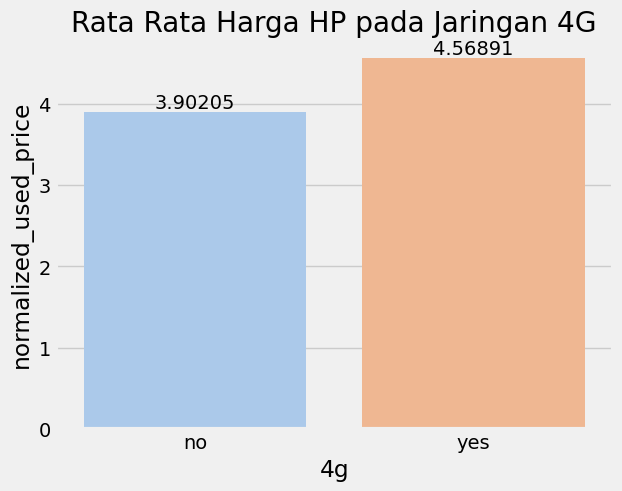

In [38]:
sns.set_palette("pastel")
d=data.groupby("4g")[['normalized_used_price']].mean().reset_index()
ax=sns.barplot(data=d,x='4g',y='normalized_used_price',errwidth=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Rata Rata Harga HP pada Jaringan 4G')

#### Insight
Device yang memiliki jaringan internet 4g cenderung lebih mahal dari pada yang tidak memiliki jaringan 4g

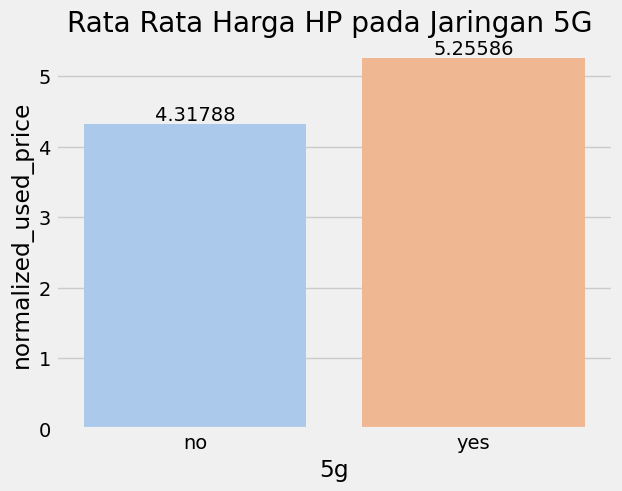

In [39]:
sns.set_palette("pastel")
d=data.groupby("5g")[['normalized_used_price']].mean().reset_index()
ax=sns.barplot(data=d,x='5g',y='normalized_used_price',errwidth=0)
plt.title('Rata Rata Harga HP pada Jaringan 5G ')
for i in ax.containers:
    ax.bar_label(i,)

#### Insight
Device yang memiliki jaringan internet 5g cenderung lebih mahal dari pada yang tidak memiliki jaringan 5g

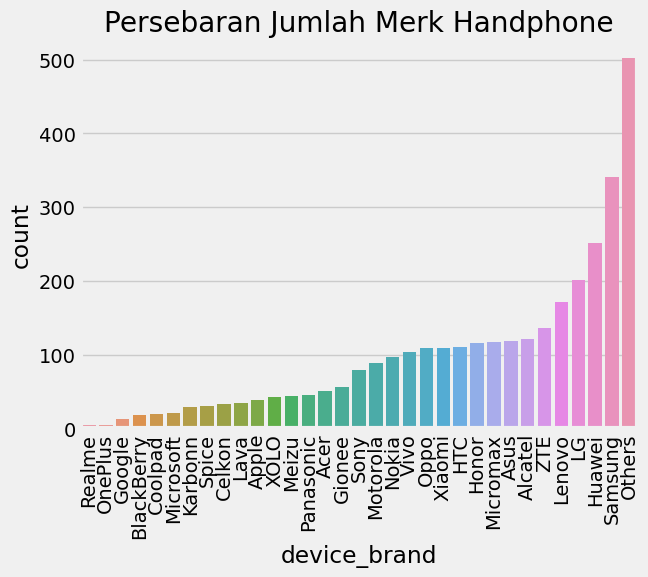

In [8]:
#sns.countplot('device_brand',data=data)

# create countplot with x axis representing device brand
ax = sns.countplot(x="device_brand", data=data, order=data['device_brand'].value_counts().index[::-1])

# set x-axis tick labels rotation to 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title('Persebaran Jumlah Merk Handphone')
# show the plot
plt.show()



#### Insight
brand perangkat 'others' memiliki jumlah penjualan paling banyak pada dataset, hal ini bisa terjadi karena harga device yang murah

In [9]:
x=data[data['device_brand']=='Others']
y=x[x['os']=='Others']
print('Banyaknya pembeli handphone bekas yang merk dan sistem operasinya "Others" adalah',len(y))

Banyaknya pembeli handphone bekas yang merk dan sistem operasinya "Others" adalah 28


In [10]:
x=data[data['4g']=='no']
y=x[x['5g']=='no']
print('Banyaknya pembeli handphone yang tidak support 4G dan 5G sebanyak',len(y))

Banyaknya pembeli handphone yang tidak support 4G dan 5G sebanyak 1105


### Split data

In [15]:
X = data.drop(['normalized_used_price'], axis=1)
y = data['normalized_used_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=42)

### Data Preprocessing

In [16]:
conservation_4g = {"no": 0, "yes": 1}
X_train["4g_encoded"] = X_train['4g'].map(conservation_4g)

conservation_5g = {"no": 0, "yes": 1}
X_train["5g_encoded"] = X_train['5g'].map(conservation_5g)
# Menggunakan One Hot Encoding untuk kolom "os"
os_one_hot = pd.get_dummies(X_train['os'], prefix='os',dtype=np.int64)

# Menggunakan One Hot Encoding untuk kolom "device_brand"
brand_one_hot = pd.get_dummies(X_train['device_brand'], prefix='brand',dtype=np.int64)

# Menggabungkan data hasil One Hot Encoding dengan data asli
X_train = pd.concat([X_train, os_one_hot, brand_one_hot], axis=1)

# Menghapus kolom asli yang telah di-encode
X_train = X_train.drop(['os', 'device_brand','4g','5g'], axis=1)

X_train

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,4g_encoded,...,brand_Others,brand_Panasonic,brand_Realme,brand_Samsung,brand_Sony,brand_Spice,brand_Vivo,brand_XOLO,brand_Xiaomi,brand_ZTE
3363,15.77,8.00,13.0,64.0,6.0,3550.0,181.0,2019,249,1,...,0,0,0,0,0,0,0,0,0,0
1405,10.16,5.00,0.3,16.0,4.0,1950.0,130.0,2013,749,0,...,0,0,0,0,0,0,0,0,0,0
1214,12.83,13.00,8.0,16.0,4.0,2600.0,155.0,2014,761,1,...,0,0,0,0,0,0,0,0,0,0
852,12.70,8.00,2.0,32.0,4.0,5000.0,180.0,2015,862,0,...,1,0,0,0,0,0,0,0,0,0
905,10.29,5.00,0.3,16.0,4.0,1800.0,145.0,2013,850,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,12.83,13.00,4.0,16.0,4.0,2800.0,155.0,2015,565,1,...,0,0,0,0,0,0,0,0,0,0
1220,12.70,4.00,5.0,32.0,4.0,2600.0,160.0,2014,1028,0,...,0,0,0,0,0,0,0,0,0,0
1384,17.78,3.15,0.3,16.0,4.0,4100.0,350.0,2014,550,0,...,0,0,0,0,0,0,0,0,0,0
947,10.29,5.00,1.3,16.0,4.0,1400.0,78.2,2014,985,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_train.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,4g_encoded,...,brand_Others,brand_Panasonic,brand_Realme,brand_Samsung,brand_Sony,brand_Spice,brand_Vivo,brand_XOLO,brand_Xiaomi,brand_ZTE
count,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,...,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000
mean,13.560065,9.491576,6.079228,50.999320,3.968463,3059.785357,180.978209,2015.738663,698.195234,0.662183,...,0.154112,0.014988,0.001153,0.103382,0.024596,0.009608,0.033820,0.013067,0.034589,0.040354
std,3.750480,4.783023,6.580418,81.872576,1.214218,1272.126438,86.306303,2.178703,234.193950,0.473057,...,0.361126,0.121530,0.033942,0.304516,0.154922,0.097567,0.180801,0.113583,0.182771,0.196825
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,75.000000,2013.000000,91.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,140.000000,2014.000000,565.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,158.000000,2015.000000,707.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.320000,13.000000,8.000000,64.000000,4.000000,3950.000000,181.000000,2018.000000,879.750000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,850.000000,2020.000000,1094.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
conservation_4g = {"no": 0, "yes": 1}
X_test["4g_encoded"] = X_test['4g'].map(conservation_4g)

conservation_5g = {"no": 0, "yes": 1}
X_test["5g_encoded"] = X_test['5g'].map(conservation_5g)
# Menggunakan One Hot Encoding untuk kolom "os"
os_one_hot = pd.get_dummies(X_test['os'], prefix='os', dtype=np.int64)

# Menggunakan One Hot Encoding untuk kolom "device_brand"
brand_one_hot = pd.get_dummies(X_test['device_brand'], prefix='brand', dtype=np.int64)

# Menggabungkan data hasil One Hot Encoding dengan data asli
X_test = pd.concat([X_test, os_one_hot, brand_one_hot], axis=1)

# Menghapus kolom asli yang telah di-encode
X_test = X_test.drop(['os', 'device_brand','4g','5g'], axis=1)


#### Scalling data  

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model

In [20]:
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
y_predtrain=lin.predict(X_train)

print('R^2 score:',(r2_score(y_test,y_pred)))
print('mape score:', mape(y_test,y_pred))
print('mae score:',mae(y_test,y_pred))
print('rmse score:',mse(y_test,y_pred,squared=False))
print('mse score:', mse(y_test,y_pred))

R^2 score: 0.7757647219594606
mape score: 0.053666283015101734
mae score: 0.21618993039681011
rmse score: 0.29469316775315907
mse score: 0.08684406312039154


#### Intepretasi hasil 
>- R2: Semua variabel independen pada model secara simultan berpengaruh 77.58% terhadap target. Terdapat 22.42% variabel tidak diketahui.
>- MAPE: Kemungkinan error atau penyimpangan sebesar 0.05 dari nilai aktual
>- MAE: Nilai penyimpangan rata-rata sebesar 0.216 dari nilai aktual 
>- RMSE: nilai penyimpangan rata-rata sebesar 0.295 dari nilai aktual 
>- MSE: nilai penyimpangan rata-rata sebesar 0.087 dari nilai aktual

In [21]:
x1 = sm.add_constant(X_train)
results = sm.OLS(y_train,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.754
Model:                               OLS   Adj. R-squared:                  0.749
Method:                    Least Squares   F-statistic:                     170.1
Date:                   Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                           23:40:35   Log-Likelihood:                -396.80
No. Observations:                   2602   AIC:                             887.6
Df Residuals:                       2555   BIC:                             1163.
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               25.6435      8.118      3.159      0.002       9.725      41.562
screen_size          0.0403      0.004     10.141      0.000       0.033       0.048
rear_camera_mp       0.0421      0.002     26.016      0.000       0.039       0.045
front_camera_mp      0.0229      0.001     16.818      0.000       0.020       0.026
internal_memory      0.0005   7.51e-05      6.949      0.000       0.000       0.001
ram                  0.0699      0.006     11.147      0.000       0.058       0.082
battery           2.147e-06   9.04e-06      0.238      0.812   -1.56e-05    1.99e-05
weight               0.0010      0.000      6.546      0.000       0.001       0.001
release_year        -0.0150      0.005     -2.911      0.004      -0.025      -0.005
days_used         4.385e-05   3.57e-05      1.227      0.220   -2.62e-05       0.000
4g_encoded           0.1311      0.018      7.245      0.000       0.096       0.167
5g_encoded           0.1663      0.045      3.707      0.000       0.078       0.254
os_Android           6.4835      2.032      3.191      0.001       2.499      10.468
os_Others            6.3388      2.033      3.118      0.002       2.352      10.326
os_Windows           6.4649      2.028      3.188      0.001       2.489      10.441
os_iOS               6.3563      2.034      3.125      0.002       2.368      10.344
brand_Acer           0.7643      0.249      3.067      0.002       0.276       1.253
brand_Alcatel        0.7412      0.248      2.987      0.003       0.255       1.228
brand_Apple          1.1779      0.321      3.673      0.000       0.549       1.807
brand_Asus           0.8287      0.247      3.349      0.001       0.343       1.314
brand_BlackBerry     0.9532      0.251      3.794      0.000       0.461       1.446
brand_Celkon         0.4945      0.250      1.980      0.048       0.005       0.984
brand_Coolpad        0.7212      0.256      2.822      0.005       0.220       1.222
brand_Gionee         0.8387      0.248      3.382      0.001       0.352       1.325
brand_Google         1.0346      0.264      3.926      0.000       0.518       1.551
brand_HTC            0.8404      0.246      3.415      0.001       0.358       1.323
brand_Honor          0.7107      0.250      2.844      0.004       0.221       1.201
brand_Huawei         0.7710      0.247      3.122      0.002       0.287       1.255
brand_Karbonn        0.6138      0.250      2.452      0.014       0.123       1.105
brand_LG             0.8272      0.246      3.357      0.001       0.344       1.310
brand_Lava           0.7385      0.253      2.919      0.004       0.242       1.235
brand_Lenovo         0.7460      0.247      3.020      0.003       0.262       1.230
brand_Meizu          0.7329      0.253      2.902      0.004       0.238   

#### Insight
Variabel yang tidak signifikan terhadap variabel dependen adalah 
1. battery dengan p-value 0.812
2. Days_used dengan p_value 0.220
Terijadi karena variansi kecil 

Prob (F-statistic) < 0.05 yang berarti ada pengaruh secara bersama – sama atau simultan antara variabel independen terhadap variabel dependen.

R2 hasil model dengan data train adalah 0.754.
Semua variabel independen pada model secara simultan berpengaruh 75.4% terhadap target. Terdapat 24.6% variabel tidak diketahui.




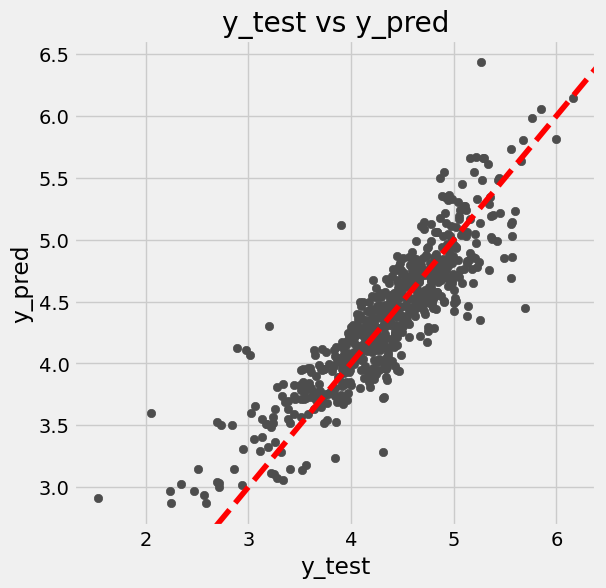

In [22]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_test, y_pred, c=".3")
add_identity(ax, color='r', ls='--')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')
plt.show()

#### Insight 
dari hasil diatas nilai y_test dan y_pred terbentuk di sekitar garis diagonal, yang artinya terdapat kemiripan antar nilai prediksi dengan nilai sebenarnya

# Kesimpulan

>- Variabel battery dan ukuran layar berkorelasi cukup tinggi dengan harga cellphone 

>- Semua variabel independen pada model secara simultan berpengaruh 77.58% terhadap target. Terdapat 22.42% variabel tidak diketahui.

>- Variabel yang tidak signifikan terhadap variabel dependen adalah 
    1. battery dengan p-value 0.812
    2. Days_used dengan p_value 0.220
   
>- Secara keseluruhan, model yang digunakan untuk dataset cellphone dapat dikatakan cukup baik karena memiliki nilai-nilai ukuran statistik yang cukup rendah (untuk MAE, MAPE, MSE, dan RMSE) dan cukup tinggi (untuk R-squared).